# Comparing line plots of electrocardiogram waveforms
### Let's compare the waveforms of ECG from an individual with an arrhythmia to ones from an individual without any diagnosed arrhythmia

#### Created by Deborah Won

### First load in the normal sinus rhythm ECG and separate out the time variable from the ECG

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("ecg1min.csv")

In [3]:
# QUESTION:  How do we find out what variables are stored in this data file?

data.columns

Index(['time', 'Vecg'], dtype='object')

In [4]:
# Extract time and ecg into separate variables
time = data["time"]
ecg = data["Vecg"]
#time = data[___________]
#ecg = data__"Var2"__

## Finding the average ECG profile

In [5]:
import matplotlib.pyplot as plt

import matplotlib as mp

from scipy.signal import find_peaks

import numpy as np

### First look at the normal sinus ECG and detect peaks

Text(0.5, 0, 'time (s)')

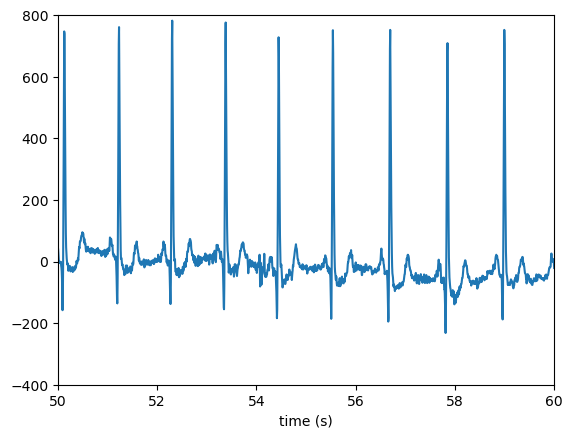

In [6]:
# Plot the ecg waveform versus time in seconds
plt.plot(time, ecg)

# Zoom in on a few heart beats using the "axis" class
plt.axis([50, 60, -400, 800])

# Label the x axis using "Axes.set_xlabel"
plt.xlabel('time (s)')

Text(0, 0.5, 'V_ecg (mV)')

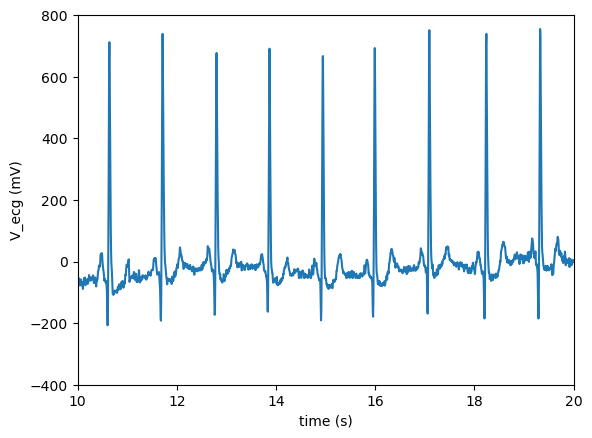

In [7]:
fig, ax = plt.subplots()

# Plot the ecg waveform versus time in seconds
ax.plot(time, ecg)

# Zoom in on a few heart beats using the "axis" class
ax.axis([10, 20, -400, 800])

# Label the x axis using "Axes.set_xlabel"
ax.set_xlabel(xlabel='time (s)')

# Label the y axis using "Axes.set_xlabel"
ax.set_ylabel(ylabel='V_ecg (mV)')

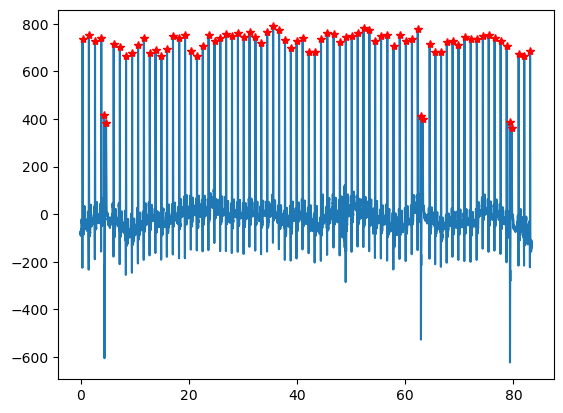

In [8]:
# Detect peaks in ECG and show that we've detected the peaks
peaks, properties = find_peaks(ecg, height=200, threshold=None, distance=None, prominence=200)
plt.plot(time, ecg)
plt.plot(time[peaks], ecg[peaks], 'r*')

In [9]:
# QUESTION: What does N represent?  
N = len(peaks)
print(N)

# ANSWER: N represents the # of peaks

79


In [12]:
# QUESTION: What is the heart rate in beats per minute?
L = len(time)

T = time[L-1]
print(T)

hr = N/T*60
print(f"Heart rate = {hr:0.1f}bpm")

83.33333333
Heart rate = 56.9bpm


In [13]:
# profileArray is a function that generates an array of ECG waveforms during a heartbeat. 
# We extract 1 second of the ECG waveform around each QRS peak and store these 1-sec segments in an array.

def profileArray(ecg, Npeaks, fs):
    tpre = round(0.4*fs)  # number of samples in 400ms
    tpost = round(0.6*fs)  # number of samples in 600ms
    ecgArray = []
    for i in range(1,Npeaks-1):  # leave out first and last, in case not enough samples before 1st one or after last one for tpre and tpost
        ecg_i = ecg[peaks[i]-tpre:peaks[i]+tpost]
        ecgArray.append(ecg_i)
    ecgArray = np.array(ecgArray)
    
    return(ecgArray)

In [14]:
# Now let's find the average ECG profile during a heartbeat during normal sinus rhythm
# QUESTION: What is the output of profile Array? What type of variable, and what are the dimensions?
# QUESTION: Explain what the dimensions of qrs tell us? What do they represent in terms of the problem of creating the average ECG profile?
fs = 250
qrs = profileArray(ecg, N, fs)
print(type(qrs))
print(qrs.shape)

<class 'numpy.ndarray'>
(77, 250)


In [15]:
# Find the average ECG profile.
# QUESTION: Along which axis should the average be taken?  Why?
avgECG = np.mean(qrs, axis=0)
avgECG.shape

(250,)

In [16]:
# Create a time vector that represents the # of ms relative to the QRS peak.
tpre = round(0.4*fs)  # number of samples in 400ms
tpost = round(0.6*fs)  # number of samples in 600ms
tSeg = np.arange(-tpre, tpost, 1)
tSeg = tSeg/fs

Text(0, 0.5, 'Vecg (mV)')

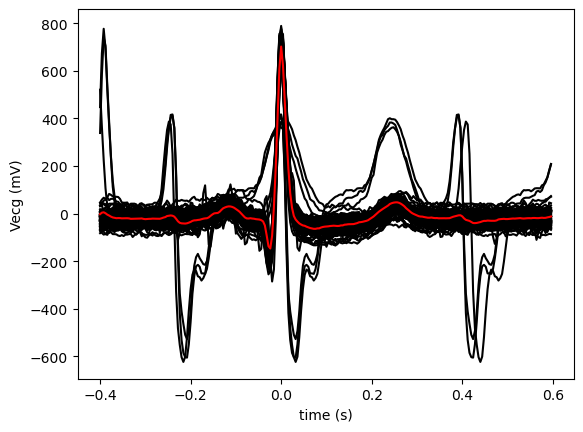

In [30]:
#Let's plot the average ECG profile in red on top of the individual heartbeat waveforms in black
# QUESTION: Would you say in general there seems to be a stereotypical pattern in the ECG waveform during normal sinus rhythm?
# Explain your answer.
#plt.figure()
plt.plot(tSeg, np.transpose(qrs), 'k')
plt.plot(tSeg, avgECG, 'r')
plt.xlabel('time (s)')
plt.ylabel('Vecg (mV)')
#plt.legend(['individual beats', 'avg profile'])

# ax = plt.gca()
# tr1, = ax.plot(tSeg, np.transpose(qrs), 'k', label='trace1')
# tr2, = ax.plot(tSeg, avgECG, 'r', label='trace2')
# ax.set_xlabel('time (s)')
# ax.legend(handles=[tr1, tr2]) #['tr1', 'tr2']) #'individual beats', 'avg profile')

## Now, let's find the average profile for the ECG from the individual with arrhythmia

In [32]:
# Read in the .csv file arrhythmia5.csv
pth = "C:/EE2810/Data/"
filename = pth + "arrhythmia5.csv"

arrhythDF = pd.read_csv(filename)


In [33]:
# Again, figure out the column names
arrhythDF.columns

Index(['t', 'ECGArrhyth5'], dtype='object')

In [34]:
# Store time and the ECG in separate variables
t = arrhythDF["t"]
ecgArr = arrhythDF["ECGArrhyth5"]

(10.0, 13.0, -500.0, 1200.0)

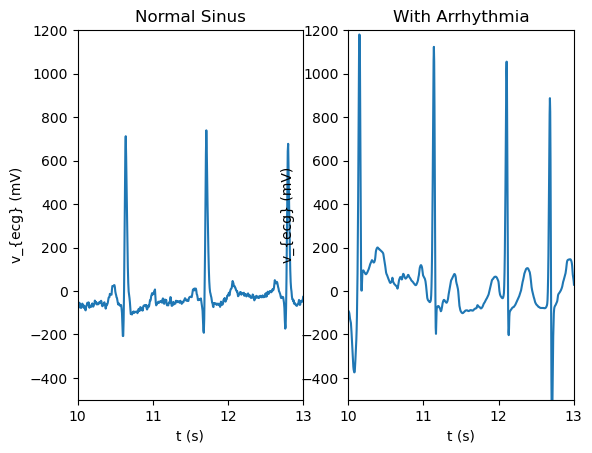

In [35]:
# Plot the normal sinus and arrhythmic ECG in two side-by-side subplots, zooming in on a few seconds of the signal
plt.subplot(1,2,1)
plt.plot(time, ecg)
plt.xlabel('t (s)')
plt.ylabel('v_{ecg} (mV)')
plt.title('Normal Sinus')
plt.axis([10, 13, -500, 1200])

plt.subplot(1,2,2)
plt.plot(t, ecgArr)
plt.xlabel('t (s)')
plt.ylabel('v_{ecg} (mV)')
plt.title('With Arrhythmia')
plt.axis([10, 13, -500, 1200])

In [36]:
# Find the peaks and the average profile for a heartbeat of the arrhythmic ECG 
peaks, properties = find_peaks(ecgArr, height=200, threshold=None, distance=None, prominence=200)
Npeaks = len(peaks)

fs = 250
qrsArrhyth = profileArray(ecgArr, Npeaks, fs)

avgECGArrhyth = np.mean(qrsArrhyth, axis=0)
avgECGArrhyth.shape

(250,)

In [58]:
# peaks, properties = find_peaks(ecg, height=200, threshold=None, distance=None, prominence=200)
# Npeaks = len(peaks)

# fs = 250
# tpre = round(0.4*fs)  # number of samples in 400ms
# tpost = round(0.6*fs)  # number of samples in 600ms
# qrsArr = []
# for i in range(1,Npeaks-1):  # leave out first and last, in case not enough samples before 1st one or after last one for tpre and tpost
#     ecg_i = ecg[peaks[i]-tpre:peaks[i]+tpost]
#     qrsArr.append(ecg_i)
# print(ecg_i.shape)
# print(len(qrsArr))
# qrsArr = np.array(qrsArr)
# print(qrsArr.shape)



(250,)
77
(77, 250)


(250,)

In [66]:
qrsArr = profileArray(ecgArr, Npeaks, fs)

In [60]:
avgECGArr = np.mean(qrsArr, axis=0)
avgECGArr.shape


(250,)

(-0.25, 0.5, -650.0, 1500.0)

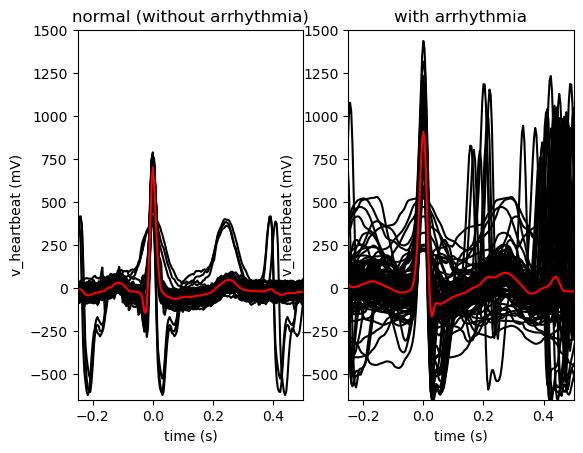

In [38]:
# Plot the ECG segments and the average ECG superimposed in red. 
# Do this for normal (without arrhythmia) and with arrhythmia in side by side subplots.
plt.subplot(1,2,1)
plt.plot(tSeg, np.transpose(qrs), 'k')
plt.plot(tSeg, avgECG, 'r')
plt.xlabel('time (s)')
plt.ylabel('v_heartbeat (mV)')
plt.title('normal (without arrhythmia)')
plt.axis([-0.25, 0.5, -650, 1500])

plt.subplot(1,2,2)
plt.plot(tSeg, np.transpose(qrsArrhyth), 'k')
plt.plot(tSeg, avgECGArrhyth, 'r')
plt.xlabel('time (s)')
plt.ylabel('v_heartbeat (mV)')
plt.title('with arrhythmia')
plt.axis([-0.25, 0.5, -650, 1500])

In [ ]:
# QUESTION What differences do you notice between the two scenarios?
# What can you say about the effect of arrhythmia?
# How would you quantify these differences?

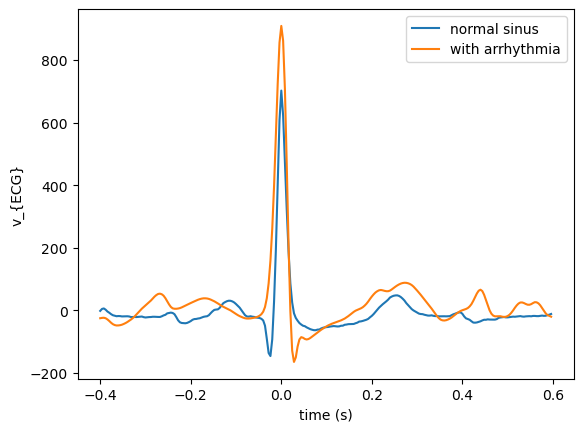

In [70]:
# Overlay the average ECG with and without arrhthmia
# QUESTION What differences do you notice between the two?
plt.plot(tSeg, avgECG)
plt.plot(tSeg, avgECGArrhyth)
ax = plt.gca()
ax.set_xlabel('time (s)')
ax.set_ylabel('v_{ECG}')
ax.legend(['normal sinus', 'with arrhythmia'])

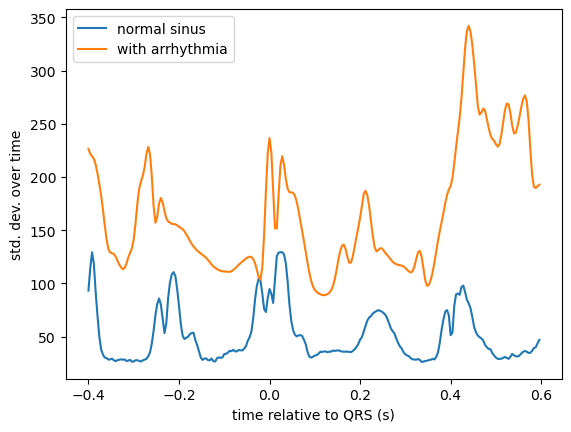

In [71]:
# Compare the standard deviation (or variability) over the course of the heartbeat during normal sinus rhythm vs. arrhythmia
sdECG = np.std(qrs, axis=0)
plt.plot(tSeg, sdECG)

# Complete the code
sdArr = np.std(qrsArrhyth, axis=0)
plt.plot(tSeg, sdArr)

# QUESTION: How would you describe the difference between the ECG in normal sinus rhythm and during arrhythmia?
ax = plt.gca()
ax.set_xlabel('time relative to QRS (s)')
ax.set_ylabel('std. dev. over time')
ax.legend(['normal sinus', 'with arrhythmia'])